<a href="https://colab.research.google.com/github/AnberAziz/BS-DS-Project/blob/main/Week3Anber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

print("--- Please upload your 'kaggle.json' file ---")
# This will prompt you to upload the kaggle.json file
files.upload()

--- Please upload your 'kaggle.json' file ---


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anberaziz","key":"51b0632a958ba40eb6e93d29e8ea615c"}'}

In [2]:
# -----------------------------------------------------------------------
# Part 1: Environment Setup & Data Collection (from Week 1)
# -----------------------------------------------------------------------
print("--- Part 1: Setting up Kaggle and Downloading Dataset ---")

# 1. Install Kaggle library
!pip install kaggle -q

# 2. Set up the Kaggle API token
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print("Kaggle API token installed.")

# 3. Download the dataset
!kaggle datasets download -d aljarah/xAPI-Edu-Data

print("\nDataset downloaded. Unzipping...")

# 4. Unzip the dataset
!unzip -o xAPI-Edu-Data.zip
print("--- Setup Complete. Dataset 'xAPI-Edu-Data.csv' is ready. ---")

--- Part 1: Setting up Kaggle and Downloading Dataset ---
Kaggle API token installed.
Dataset URL: https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data
License(s): CC-BY-SA-4.0
  0% 0.00/5.54k [00:00<?, ?B/s]
100% 5.54k/5.54k [00:00<00:00, 21.0MB/s]

Dataset downloaded. Unzipping...
Archive:  xAPI-Edu-Data.zip
  inflating: xAPI-Edu-Data.csv       
--- Setup Complete. Dataset 'xAPI-Edu-Data.csv' is ready. ---


In [3]:
# -----------------------------------------------------------------------
# Part 2: Load Libraries and Clean Data (from Week 2)
# -----------------------------------------------------------------------
print("\n--- Part 2: Loading Libraries and Cleaning Data ---")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('xAPI-Edu-Data.csv')

# Create a copy for cleaning
df_cleaned = df.copy()

# Step 1: Standardize Column Names
df_cleaned.rename(columns={
    'gender': 'gender',
    'NationalITy': 'nationality',
    'PlaceofBirth': 'place_of_birth',
    'StageID': 'stage_id',
    'GradeID': 'grade_id',
    'SectionID': 'section_id',
    'Topic': 'topic',
    'Semester': 'semester',
    'Relation': 'relation',
    'raisedhands': 'raised_hands',
    'VisITedResources': 'visited_resources',
    'AnnouncementsView': 'announcements_view',
    'Discussion': 'discussion',
    'ParentAnsweringSurvey': 'parent_answering_survey',
    'ParentschoolSatisfaction': 'parent_school_satisfaction',
    'StudentAbsenceDays': 'student_absence_days',
    'Class': 'class_label'
}, inplace=True)

# Step 2: Handle Missing Values (None found in this dataset)
# Step 3: Remove Duplicates
dups_found = df_cleaned.duplicated().sum()
df_cleaned = df_cleaned.drop_duplicates()
print(f"Removed {dups_found} duplicate rows.")

# Step 4: Convert 'student_absence_days'
df_cleaned['student_absence_days'] = df_cleaned['student_absence_days'].map({'Under-7': 0, 'Above-7': 1})
print("Converted 'student_absence_days' to numerical (0/1).")

# Step 5: Treat outliers in 'raised_hands' (as a demo)
col_to_treat_demo = 'raised_hands'
Q1 = df_cleaned[col_to_treat_demo].quantile(0.25)
Q3 = df_cleaned[col_to_treat_demo].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned[col_to_treat_demo] = df_cleaned[col_to_treat_demo].clip(lower=lower_bound, upper=upper_bound)
print("Clipped outliers in 'raised_hands'.")

# Step 6: Encode binary features
df_cleaned['parent_answering_survey'] = df_cleaned['parent_answering_survey'].map({'Yes': 1, 'No': 0})
df_cleaned['parent_school_satisfaction'] = df_cleaned['parent_school_satisfaction'].map({'Good': 1, 'Bad': 0})
print("Encoded 'parent_answering_survey' and 'parent_school_satisfaction'.")
print("--- Data Cleaning Complete. Ready for Visualization. ---")


--- Part 2: Loading Libraries and Cleaning Data ---
Removed 2 duplicate rows.
Converted 'student_absence_days' to numerical (0/1).
Clipped outliers in 'raised_hands'.
Encoded 'parent_answering_survey' and 'parent_school_satisfaction'.
--- Data Cleaning Complete. Ready for Visualization. ---



--- Part 3: Week 3 Data Visualization ---

[Plot 1: Bar Chart of Student Performance (Target Variable)]


/tmp/ipython-input-3884961612.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='class_label', order=class_order, palette='viridis')


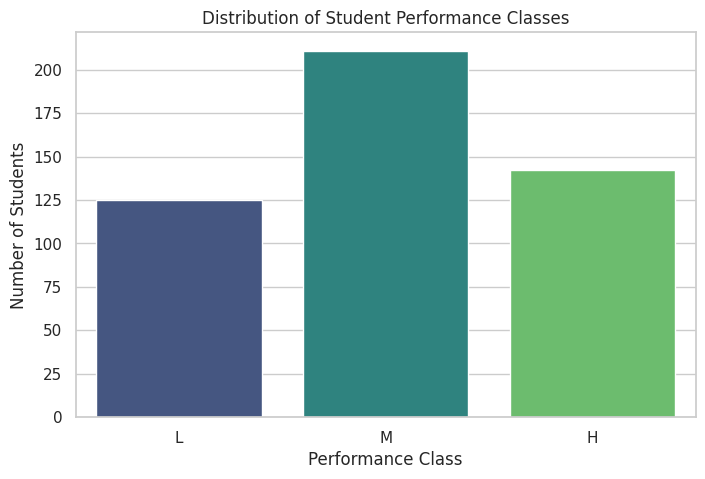


Insight 1: The dataset is relatively balanced, though not perfectly.
There are more students in the 'Medium' and 'High' categories than in the
'Low' category. This is good, as it means our AI model will have a
decent number of examples for each class to learn from.


[Plot 2: Histogram of 'Visited Resources']


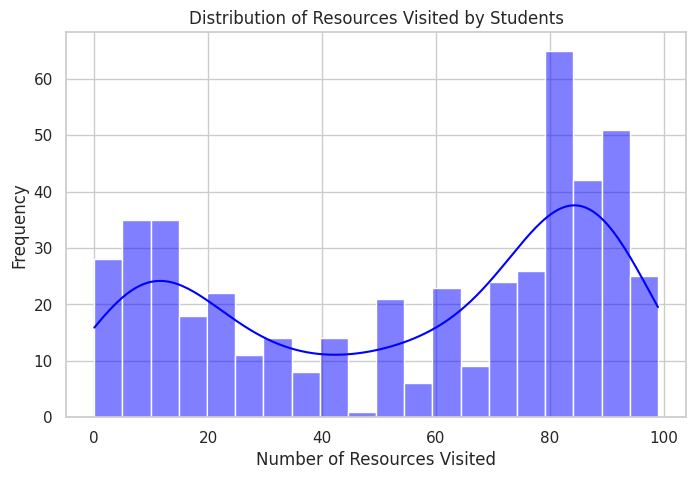


Insight 2: The 'visited_resources' feature has a bimodal distribution
(two peaks). One large group of students visits a high number of
resources (around 80-90), while a smaller group visits very few
(around 10-20). This suggests students might fall into
'highly engaged' and 'disengaged' groups.


[Plot 3: Scatter Plot of 'Raised Hands' vs. 'Visited Resources']


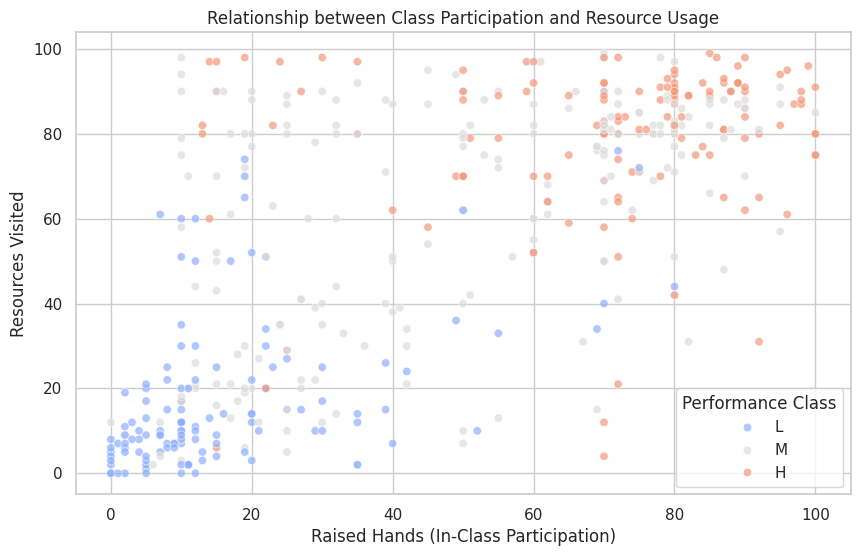


Insight 3: There is a strong, positive correlation between raising hands
and visiting resources. Students who participate more in class also tend
to use more online resources. More importantly, the 'High' (H) class
students are clustered in the top-right (high participation, high resources),
while 'Low' (L) class students are clustered in the bottom-left.
This suggests these two features will be very strong predictors for our model.


[Plot 4: Box Plot of 'Announcements Viewed' by Performance Class]


/tmp/ipython-input-3884961612.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='class_label', y='announcements_view',


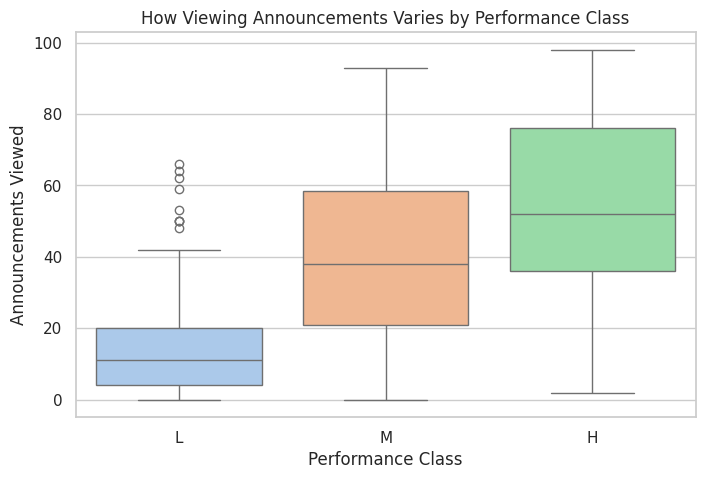


Insight 4: Students in the 'High' (H) and 'Medium' (M) classes
viewed significantly more announcements than students in the 'Low' (L) class.
The median (the line in the middle of the box) for the 'L' class is much
lower. This indicates that engagement with course announcements is
another good indicator of student performance.


[Plot 5: Count Plot of Parent Survey Response by Performance Class]


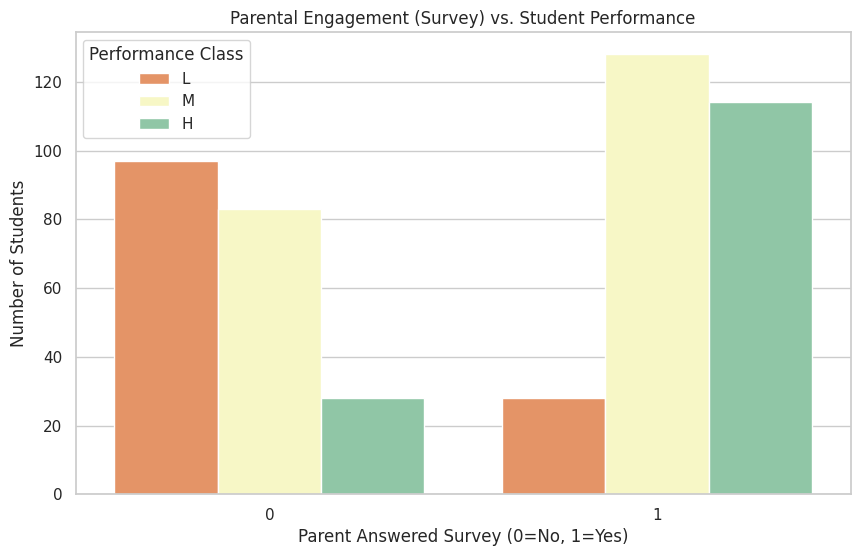


Insight 5: Parental involvement seems to matter. For students whose
parents answered the survey (1), the proportion of 'High' (H) and
'Medium' (M) performers is much larger than 'Low' (L) performers.
Conversely, for students whose parents did *not* answer (0), the
number of 'Low' performers is significantly higher.


--- Week 3 Visualization Complete! ---


In [4]:
# -----------------------------------------------------------------------
# Part 3: Week 3 - Data Visualization (Assignment 3)
# -----------------------------------------------------------------------
print("\n--- Part 3: Week 3 Data Visualization ---")

# Set a nice style for the plots
sns.set_theme(style="whitegrid")

# Define the order for our target variable (Low, Medium, High)
class_order = ['L', 'M', 'H']

# --- Plot 1: Bar Chart (Class Task) ---
# Goal: Understand the distribution of our target variable 'class_label'.
print("\n[Plot 1: Bar Chart of Student Performance (Target Variable)]")
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='class_label', order=class_order, palette='viridis')
plt.title('Distribution of Student Performance Classes')
plt.xlabel('Performance Class')
plt.ylabel('Number of Students')
plt.show()

print("""
Insight 1: The dataset is relatively balanced, though not perfectly.
There are more students in the 'Medium' and 'High' categories than in the
'Low' category. This is good, as it means our AI model will have a
decent number of examples for each class to learn from.
""")

# --- Plot 2: Histogram (Class Task) ---
# Goal: Understand the distribution of a key numerical feature.
print("\n[Plot 2: Histogram of 'Visited Resources']")
plt.figure(figsize=(8, 5))
sns.histplot(data=df_cleaned, x='visited_resources', kde=True, bins=20, color='blue')
plt.title('Distribution of Resources Visited by Students')
plt.xlabel('Number of Resources Visited')
plt.ylabel('Frequency')
plt.show()

print("""
Insight 2: The 'visited_resources' feature has a bimodal distribution
(two peaks). One large group of students visits a high number of
resources (around 80-90), while a smaller group visits very few
(around 10-20). This suggests students might fall into
'highly engaged' and 'disengaged' groups.
""")

# --- Plot 3: Scatter Plot (Class Task) ---
# Goal: Explore the relationship between two numerical features.
print("\n[Plot 3: Scatter Plot of 'Raised Hands' vs. 'Visited Resources']")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='raised_hands', y='visited_resources', hue='class_label',
                hue_order=class_order, palette='coolwarm', alpha=0.7)
plt.title('Relationship between Class Participation and Resource Usage')
plt.xlabel('Raised Hands (In-Class Participation)')
plt.ylabel('Resources Visited')
plt.legend(title='Performance Class')
plt.show()

print("""
Insight 3: There is a strong, positive correlation between raising hands
and visiting resources. Students who participate more in class also tend
to use more online resources. More importantly, the 'High' (H) class
students are clustered in the top-right (high participation, high resources),
while 'Low' (L) class students are clustered in the bottom-left.
This suggests these two features will be very strong predictors for our model.
""")

# --- Plot 4: Box Plot ---
# Goal: Compare a numerical feature across different categories of our target.
print("\n[Plot 4: Box Plot of 'Announcements Viewed' by Performance Class]")
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned, x='class_label', y='announcements_view',
            order=class_order, palette='pastel')
plt.title('How Viewing Announcements Varies by Performance Class')
plt.xlabel('Performance Class')
plt.ylabel('Announcements Viewed')
plt.show()

print("""
Insight 4: Students in the 'High' (H) and 'Medium' (M) classes
viewed significantly more announcements than students in the 'Low' (L) class.
The median (the line in the middle of the box) for the 'L' class is much
lower. This indicates that engagement with course announcements is
another good indicator of student performance.
""")

# --- Plot 5: Count Plot (Categorical vs. Categorical) ---
# Goal: See how a categorical feature relates to the target variable.
print("\n[Plot 5: Count Plot of Parent Survey Response by Performance Class]")
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='parent_answering_survey', hue='class_label',
              hue_order=class_order, palette='Spectral')
plt.title('Parental Engagement (Survey) vs. Student Performance')
plt.xlabel('Parent Answered Survey (0=No, 1=Yes)')
plt.ylabel('Number of Students')
plt.legend(title='Performance Class')
plt.show()

print("""
Insight 5: Parental involvement seems to matter. For students whose
parents answered the survey (1), the proportion of 'High' (H) and
'Medium' (M) performers is much larger than 'Low' (L) performers.
Conversely, for students whose parents did *not* answer (0), the
number of 'Low' performers is significantly higher.
""")

print("\n--- Week 3 Visualization Complete! ---")